In [1]:
import sys
import os
sys.path.append("/home/kirilman/Project/asbestos/yolov5")
sys.path.append("/home/kirilman/Project/asbestos/")
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path
import cv2
from yolov5.utils.general import xywhn2xyxy, xywh2xyxy
import seaborn

/home/kirilman/miniconda3/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
from tools.plots import plot_bboxs

In [3]:
path_2_label = Path('/home/kirilman/Project/asbestos/yolov7/runs/detect/exp2/labels')
path_2_label_yolo5 = Path('/home/kirilman/Project/asbestos/yolov5/runs/detect/exp/labels')
files = sorted(os.listdir(path_2_label))
image_files = sorted(os.listdir(path_2_label.parent))

In [4]:
files.index('637412036041010324.txt')

35

In [16]:
N = 39
labels_one = np.loadtxt(path_2_label / files[N] )
yolo5_labels = np.loadtxt(path_2_label_yolo5 / files[N])
img_source = cv2.imread(str(Path('/home/kirilman/Project/dataset/detection_set2/test/') / image_files[N]))
img_source = cv2.resize(img_source,(1024,1024))
img7 = plot_bboxs(img_source.copy(), xywh2xyxy(labels_one[:,1:],), line_thickness = 2)
img5 = plot_bboxs(img_source.copy(), xywh2xyxy(yolo5_labels[:,1:],), color = [0,0,255],line_thickness = 2, sline=4)
fig = plt.figure(dpi = 150, figsize=(10,10))

plt.imsave('7.png', img7)
plt.imsave('5.png', img5)

<Figure size 1500x1500 with 0 Axes>

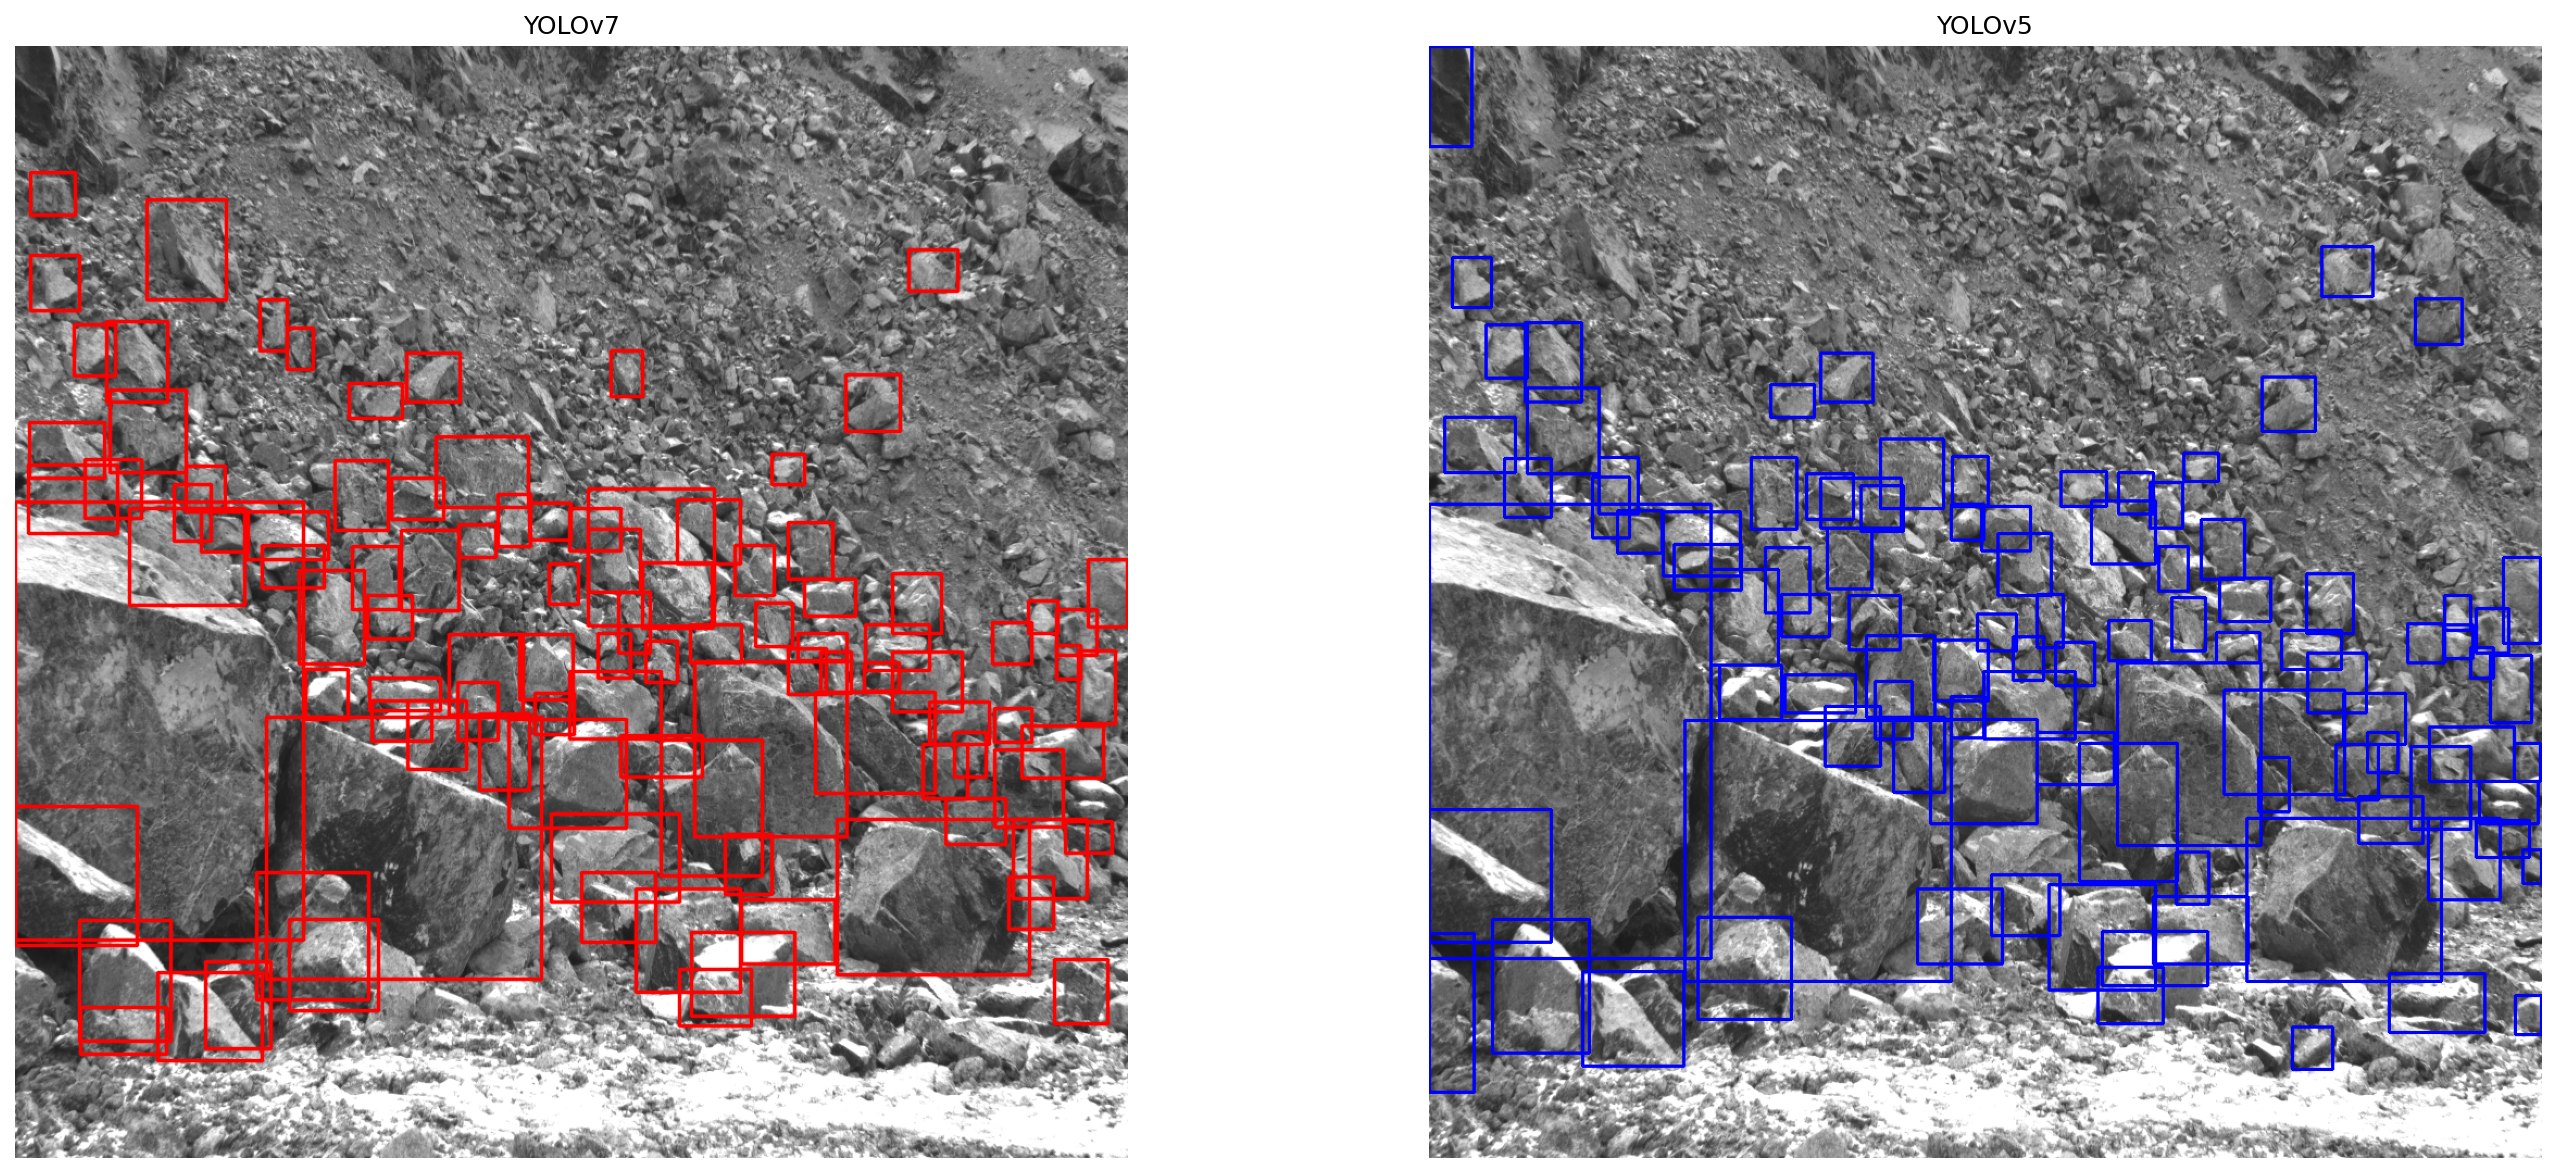

In [17]:
fig,ax = plt.subplots(1,2,dpi = 150, figsize=(19,8))
fig.tight_layout()
ax[0].imshow(img7)
ax[0].axis('off')
ax[0].set_title('YOLOv7')

ax[1].imshow(img5)
ax[1].axis('off')
ax[1].set_title('YOLOv5')
plt.savefig('7_and_5.png', transparent=False)

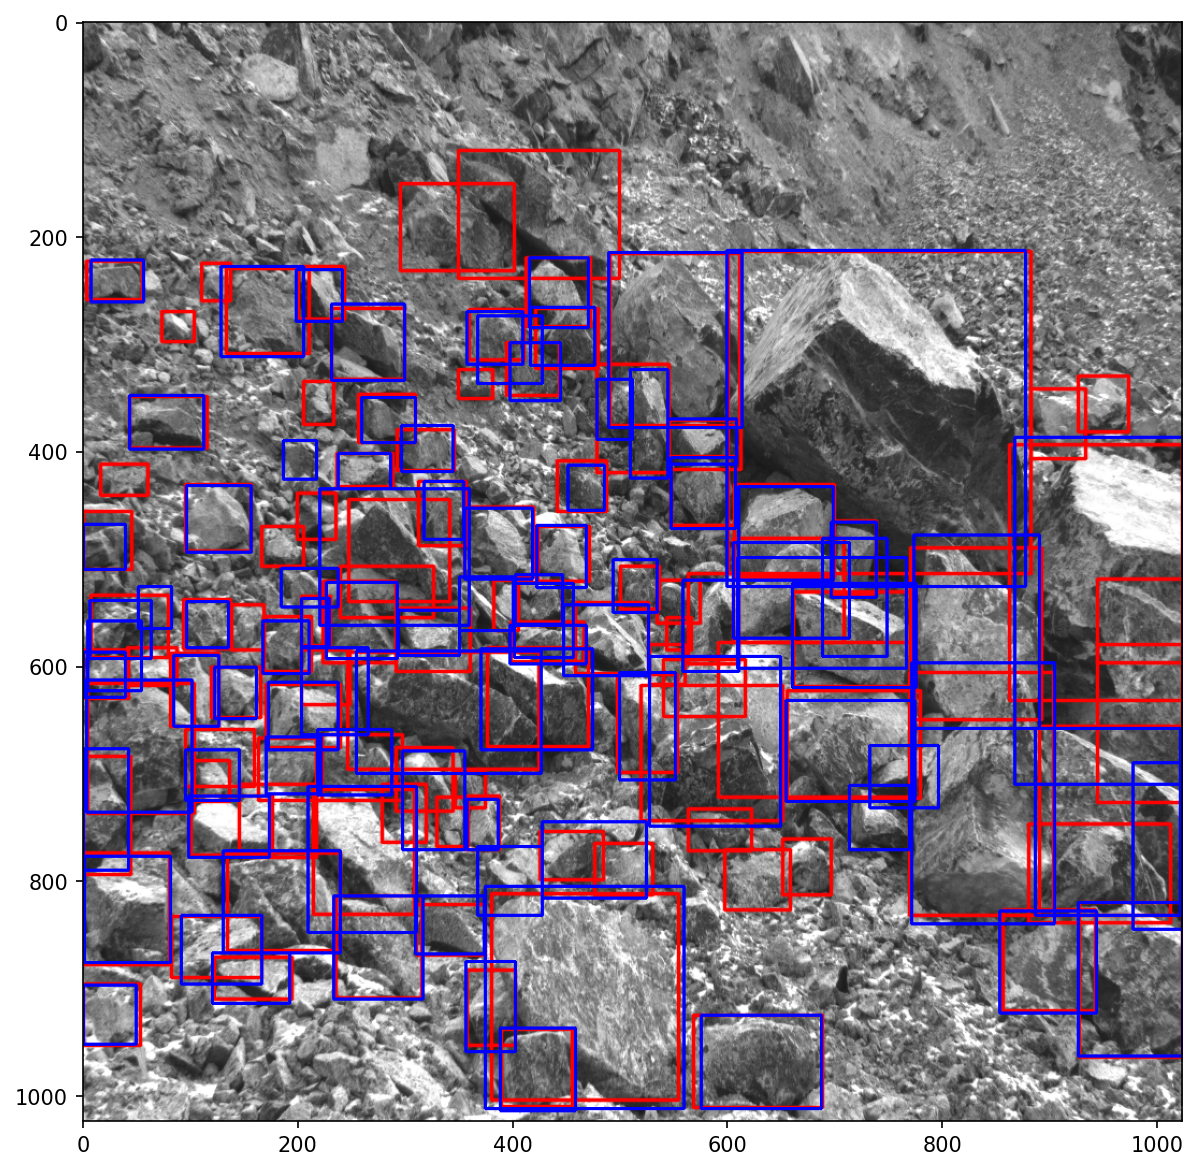

In [49]:
fig = plt.figure(dpi = 150, figsize=(8,8))
img_compare = plot_bboxs(img_source.copy(), xywh2xyxy(labels_one[:,1:],), line_thickness = 2)
img_compare = plot_bboxs(img_compare.copy(), xywh2xyxy(yolo5_labels[:,1:],), color = [0,0, 255],line_thickness = 2, sline=4)
plt.imshow(img_compare)
fig.tight_layout()
plt.savefig('7_and_5.png', transparent=False)

In [50]:
for N in range(len(files)):
    labels_one = np.loadtxt(path_2_label / files[N] )
    if labels_one.shape[0] == 0:
        continue
    yolo5_labels = np.loadtxt(path_2_label_yolo5 / files[N])
    img_source = cv2.imread(str(Path('/home/kirilman/Project/dataset/detection_set2/test/') / image_files[N]))
    img_source = cv2.resize(img_source,(1024,1024))
    img7 = plot_bboxs(img_source.copy(), xywh2xyxy(labels_one[:,1:],), line_thickness = 2)
    img5 = plot_bboxs(img_source.copy(), xywh2xyxy(yolo5_labels[:,1:],), color = [0,0,255],line_thickness = 2, sline=4)

    fig,ax = plt.subplots(1,2,dpi = 150, figsize=(19,8))
    fig.tight_layout()
    ax[0].imshow(img7)
    ax[0].axis('off')
    ax[0].set_title('YOLOv7')

    ax[1].imshow(img5)
    ax[1].axis('off')
    ax[1].set_title('YOLOv5')
    plt.savefig('7_5/7_and_5_{}.jpeg'.format(files[N]), )
    plt.close()

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

IMG_2598.txt IMG_2598.JPG


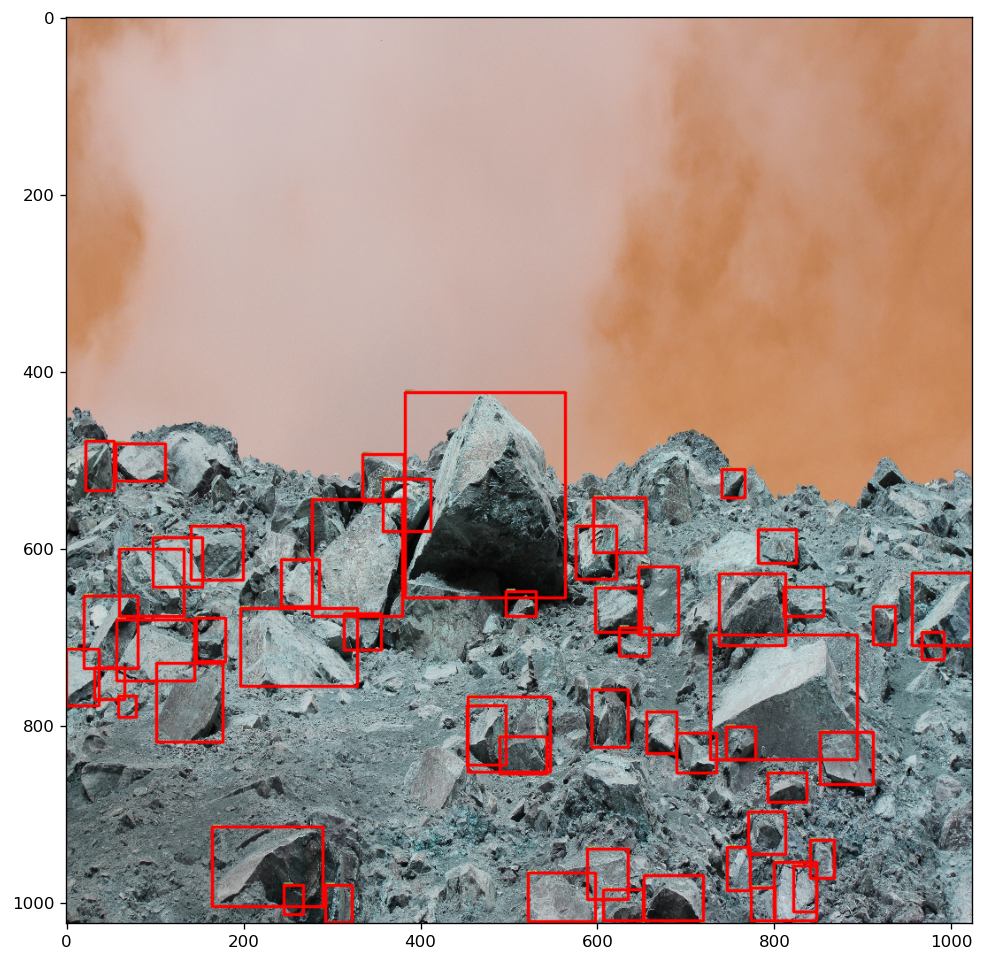

In [13]:
path_2_label = Path('/home/kirilman/Project/asbestos/yolov7/runs/detect/exp4/labels/')
N = 2
labels_files = sorted(os.listdir(path_2_label))
image_files = sorted(os.listdir(path_2_label.parent))
yolo5_labels = np.loadtxt(path_2_label / labels_files[N])
img_source = cv2.imread(path_2_label.parent / image_files[N])
img_source = cv2.resize(img_source,(1024,1024))
print(labels_files[N], image_files[N])
img7 = plot_bboxs(img_source.copy(), xywh2xyxy(yolo5_labels[:,1:],), line_thickness = 2)
fig = plt.figure(dpi = 120, figsize=(10,10))
plt.imshow(img7)
del img7

In [85]:
a = [1,-2,3]
a.sort()

In [247]:
def get_diag(coords):
    x1,y1,x2,y2 = coords
    return np.sqrt((x2 - x1)**2 + (y2 - y1)**2)
def get_square(coords):
    x1,y1,x2,y2 = coords
    return (x2-x1)*(y2-y1)

In [248]:
N = 32
path_2_label_yolo5 = Path('/home/kirilman/Project/asbestos/yolov5/runs/detect/exp/labels')
files       = list(path_2_label_yolo5.glob("*"))
image_files = list(path_2_label_yolo5.parent.glob("*.*"))
files.sort(); image_files.sort()

In [253]:
def get_metric_from_dir(p,fun_metric):
    if isinstance(p, str):
        p = Path(p)
    files = list((p.glob("*.txt")))
    diags = []
    for f in files:
        labels = np.loadtxt(f)
        if len(labels.shape) == 1:
            labels = labels.reshape(1,-1)
        for i,c in enumerate(xywh2xyxy(labels[:,1:])):
            diags.append(fun_metric(c))
    return diags

In [275]:
diags_yolo5 = np.array(get_metric_from_dir(path_2_label_yolo5,get_diag))
diags_yolo7 = np.array(get_metric_from_dir('../../yolov7/runs/detect/exp2/labels/', get_diag))
diags_yolo3 = np.array(get_metric_from_dir('../../yolov5/runs/detect/yolov3/labels/', get_diag))
diags_train = np.array(get_metric_from_dir('../../../dataset/detection_set2/test/',get_diag))

In [276]:
print(diags_train.shape, diags_yolo5.shape)

(1812,) (2542,)


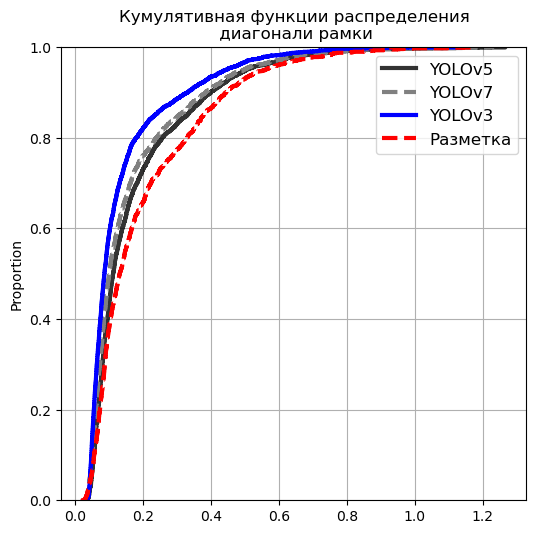

In [284]:
plt.figure(dpi = 100, figsize=(6,6))
seaborn.ecdfplot(diags_yolo5, color='black' ,alpha = 0.8,  label = 'YOLOv5', lw=3  )

ax = seaborn.ecdfplot(diags_yolo7, color='gray', linestyle = '--' , label = 'YOLOv7', lw=3 )
ax = seaborn.ecdfplot(diags_yolo3, color='blue', linestyle = '-' , label = 'YOLOv3', lw=3 )
ax = seaborn.ecdfplot(diags_train, color='red', linestyle = '--' , label = 'Разметка', lw=3 )
ax.set_title('Кумулятивная функции распределения\n диагонали рамки')
ax.legend(fontsize=12)
ax.grid()
plt.show()

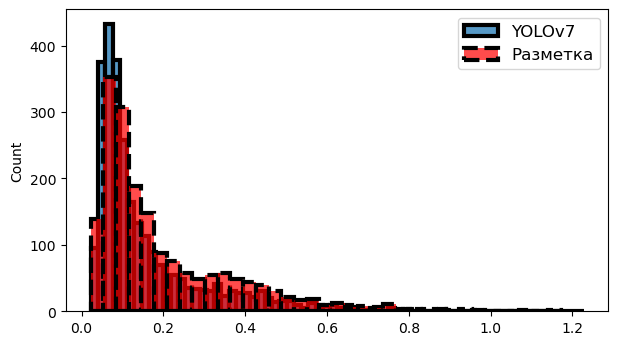

In [269]:
plt.figure(dpi = 100, figsize=(7,4))
# seaborn.histplot(diags_yolo5, color='black' ,alpha = 0.8,  label = 'YOLOv5', lw=3  )
ax = seaborn.histplot(diags_yolo7, label = 'YOLOv7', lw=3 )
ax = seaborn.histplot(diags_train, color='red', linestyle = '--' , label = 'Разметка', lw=3 ,alpha = 0.7)
ax.legend(fontsize=12)
plt.show()

In [289]:
diags_yolo7 = np.array(get_metric_from_dir('../../yolov7/runs/detect/train_set3/labels/', get_diag))
diags_train = np.array(get_metric_from_dir('../../../dataset/detection_set2/train/labels/',get_diag))
print(diags_train.shape, diags_yolo5.shape)

(9617,) (2542,)


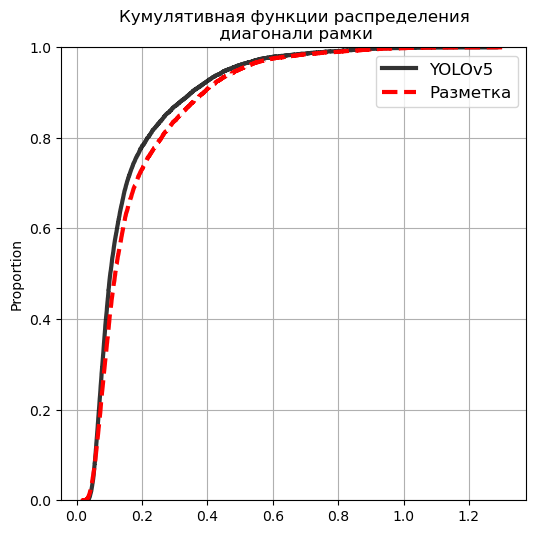

In [290]:
plt.figure(dpi = 100, figsize=(6,6))
seaborn.ecdfplot(diags_yolo7, color='black' ,alpha = 0.8,  label = 'YOLOv5', lw=3  )
ax = seaborn.ecdfplot(diags_train, color='red', linestyle = '--' , label = 'Разметка', lw=3 )
ax.set_title('Кумулятивная функции распределения\n диагонали рамки')
ax.legend(fontsize=12)
ax.grid()
plt.show()

(512, 512, 3)


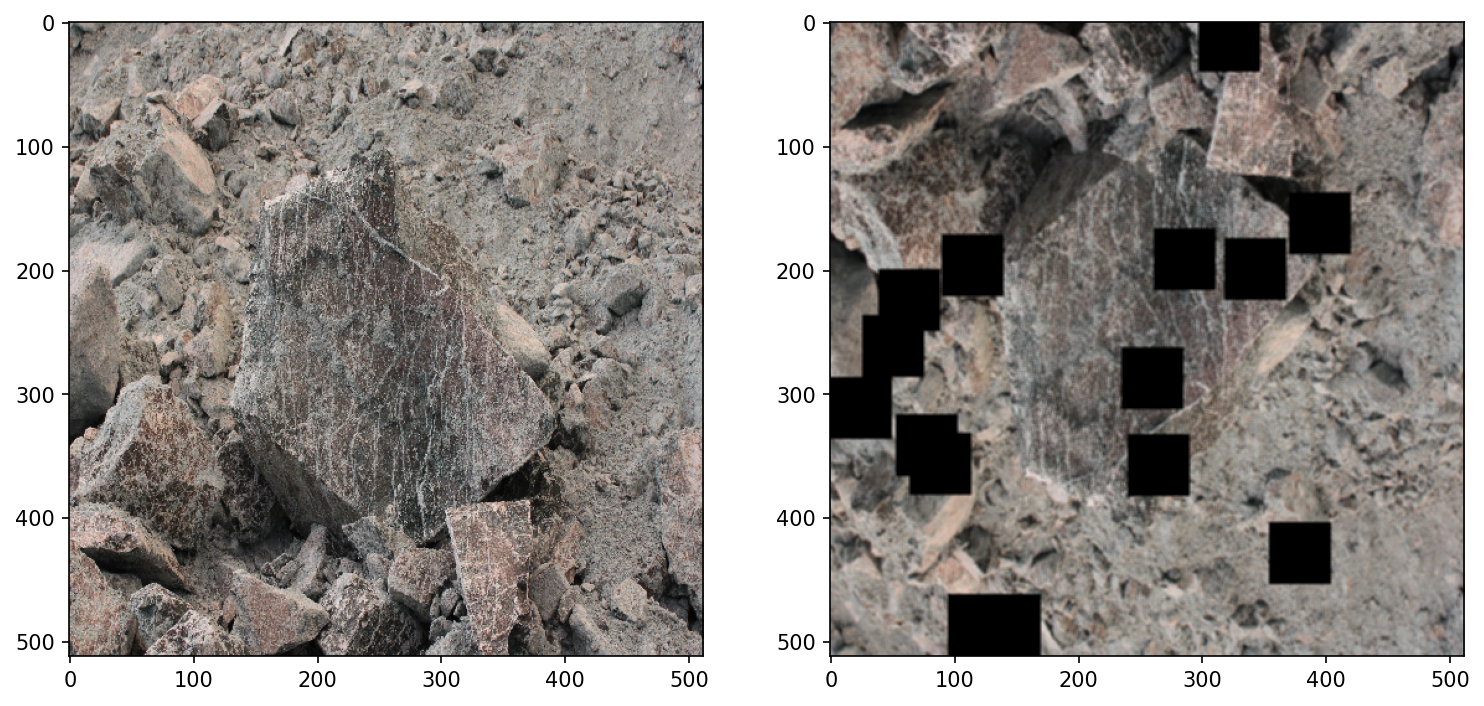

In [15]:
import cv2
from albumentations import RandomBrightnessContrast, Blur, Resize, Cutout, Compose, Flip
from pathlib import Path
import matplotlib.pyplot as plt
p = Path("/home/kirilman/Project/dataset/task_pit_from_phone-2022_04_15_12_27_27/task_pit_from_phone-2022_04_15_12_27_27-cvat for images 1.1/images/IMG_2612.JPG")
img = Resize(512,512).apply(cv2.imread(p.as_posix()))
print(img.shape)
r = int(img.shape[0]*0.02)
size = r+1 if r%2 == 0 else r

list_tr = [Cutout(15, 50, 50, p = 1), Blur(blur_limit=5,p=1), Flip(p=1)]
T = Compose(list_tr)

res = T(image=img)['image']
fig, ax = plt.subplots(1,2, dpi = 150, figsize = (12,7))
ax[0].imshow(img)
ax[1].imshow(res)

In [2]:
import torch
path_2_model = "/home/kirilman/Project/asbestos/yolov7/runs/train/yolov7_simple/weights/best.pt"
path_2_clf   = "/home/kirilman/Project/asbestos/yolov7/cfg/training/yolov7.yaml"
# state = torch.load(path_2_model)

/home/kirilman/miniconda3/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
model = torch.hub.load('../../yolov7/', 'custom', '../../yolov7/runs/train/yolov7_simple/weights/best.pt', source='local') # local repo


                 from  n    params  module                                  arguments                     
  0                -1  1       928  models.common.Conv                      [3, 32, 3, 1]                 
  1                -1  1     18560  models.common.Conv                      [32, 64, 3, 2]                
  2                -1  1     36992  models.common.Conv                      [64, 64, 3, 1]                
  3                -1  1     73984  models.common.Conv                      [64, 128, 3, 2]               
  4                -1  1      8320  models.common.Conv                      [128, 64, 1, 1]               
  5                -2  1      8320  models.common.Conv                      [128, 64, 1, 1]               
  6                -1  1     36992  models.common.Conv                      [64, 64, 3, 1]                
  7                -1  1     36992  models.common.Conv                      [64, 64, 3, 1]                
  8                -1  1     36992  

Adding autoShape... 


In [41]:
t = torch.tensor(img)
r = torch.permute(t,(2,0,1))
r.shape

torch.Size([3, 512, 512])

In [42]:
a = torch.tensor(img,dtype=torch.float).unsqueeze(0)
print(a.shape)
r = a.permute(0,3,1,2).to('cuda')
print(r.shape)
model.model.nms(False)
predict = model.model(r)

torch.Size([1, 512, 512, 3])
torch.Size([1, 3, 512, 512])


RuntimeError: CUDA out of memory. Tried to allocate 20.00 MiB (GPU 0; 5.81 GiB total capacity; 3.17 GiB already allocated; 57.88 MiB free; 3.21 GiB reserved in total by PyTorch) If reserved memory is >> allocated memory try setting max_split_size_mb to avoid fragmentation.  See documentation for Memory Management and PYTORCH_CUDA_ALLOC_CONF

In [ ]:
predict[0].shape

In [43]:
x = r
for m in model.model.modules():
    print(m)
    # x = m(x)[0]
    # print(x.shape)

Model(
  (model): Sequential(
    (0): Conv(
      (conv): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
      (act): SiLU()
    )
    (1): Conv(
      (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (bn): BatchNorm2d(64, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
      (act): SiLU()
    )
    (2): Conv(
      (conv): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn): BatchNorm2d(64, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
      (act): SiLU()
    )
    (3): Conv(
      (conv): Conv2d(64, 128, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (bn): BatchNorm2d(128, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
      (act): SiLU()
    )
    (4): Conv(
      (conv): Conv2d(128, 64, kernel_size=(1, 1), 